In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

-------------------- Exploratory Data Analysis --------------------

-> Univariate Analysis

In [3]:
df = pd.read_csv('Titanic.csv')

In [4]:
df.head

<bound method NDFrame.head of       Passengerid   Age      Fare  Sex  sibsp  Pclass  Embarked  Survived
0               1  22.0    7.2500    0      1       3       2.0         0
1               2  38.0   71.2833    1      1       1       0.0         1
2               3  26.0    7.9250    1      0       3       2.0         1
3               4  35.0   53.1000    1      1       1       2.0         1
4               5  35.0    8.0500    0      0       3       2.0         0
...           ...   ...       ...  ...    ...     ...       ...       ...
1304         1305  28.0    8.0500    0      0       3       2.0         0
1305         1306  39.0  108.9000    1      0       1       0.0         0
1306         1307  38.5    7.2500    0      0       3       2.0         0
1307         1308  28.0    8.0500    0      0       3       2.0         0
1308         1309  28.0   22.3583    0      1       3       0.0         0

[1309 rows x 8 columns]>

<AxesSubplot: ylabel='count'>

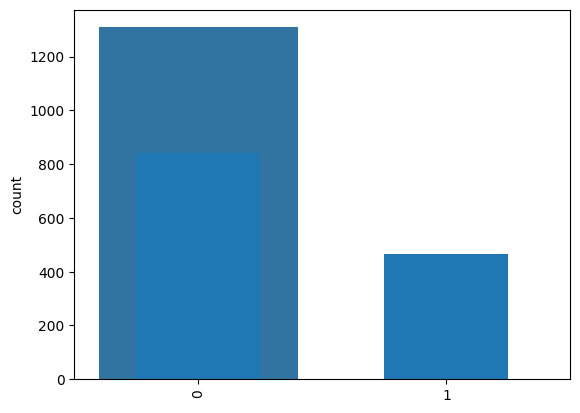

In [5]:
# Count Plot(Categorical Data)
sns.countplot(df['Sex'])
df['Sex'].value_counts().plot(kind='bar')


<AxesSubplot: ylabel='Sex'>

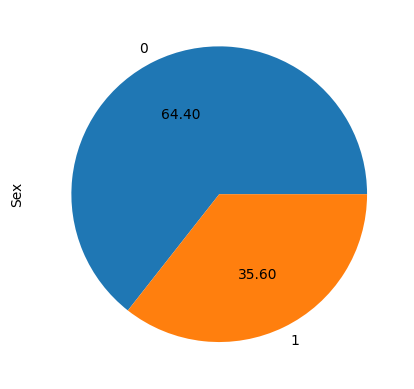

In [6]:
# Pie Chart(Categorical Data)
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

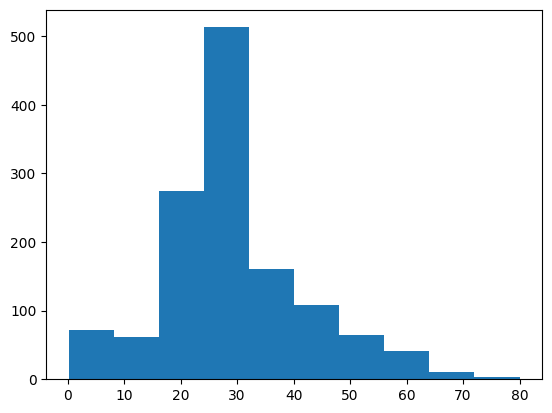

In [7]:
# Histogram(Numerical Data)
import matplotlib.pyplot as plt
plt.hist(df['Age'])

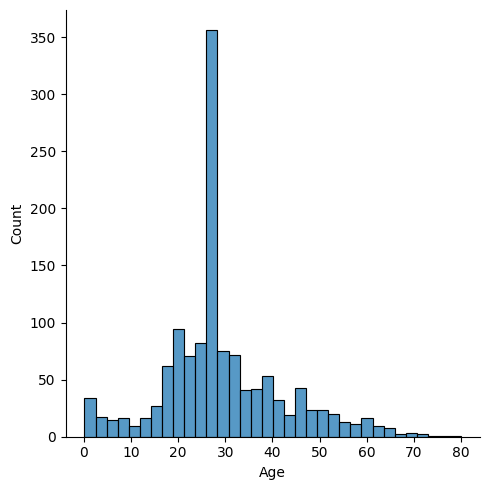

In [8]:
# Dist Plot(Numerical Data)
sns.displot(df['Age'])

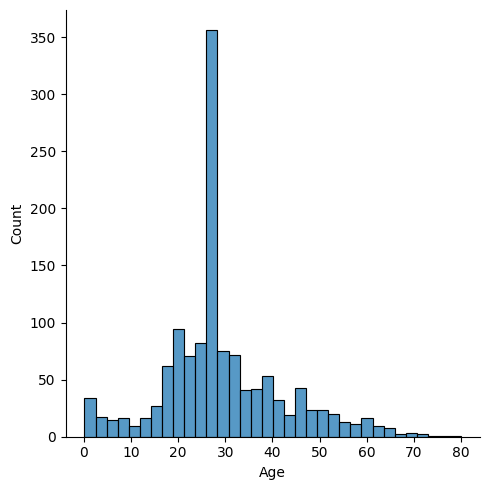

In [9]:
sns.displot(df['Age'])

<AxesSubplot: >

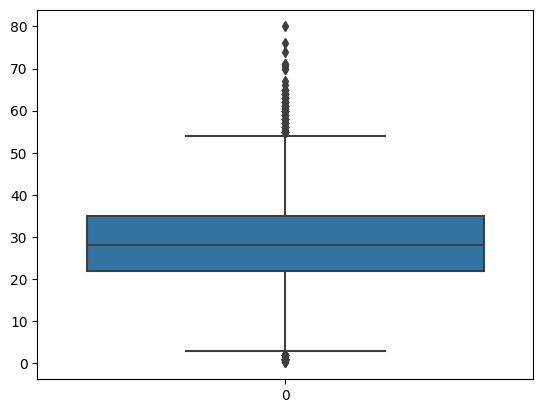

In [10]:
# Box Plot(Numerical Data)
sns.boxplot(df['Age'])

In [11]:
df['Age'].min()

0.17

In [12]:
df['Age'].max()

80.0

In [13]:
df['Age'].mean()

29.50318563789152

In [14]:
df['Age'].skew()

0.5409870816962253

-> Bivariate Analysis

In [15]:
titanic = df
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('Iris')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

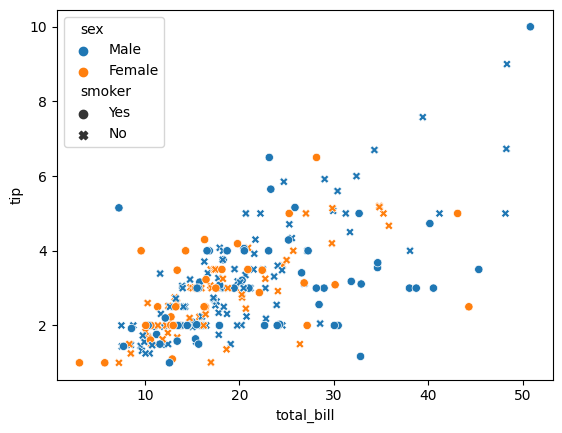

In [16]:
# Scatterplot(Numerical-Numerical)
sns.scatterplot(x='total_bill',y='tip',data=tips,hue=tips['sex'],
                style=tips['smoker'])

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

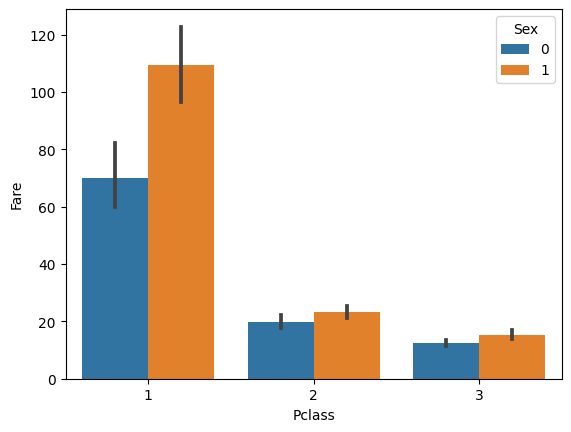

In [17]:
# Bar Plot(Numerical-Categorical)
sns.barplot(x=titanic['Pclass'],y=titanic['Fare'],hue=titanic['Sex'])

<AxesSubplot: xlabel='Sex', ylabel='Age'>

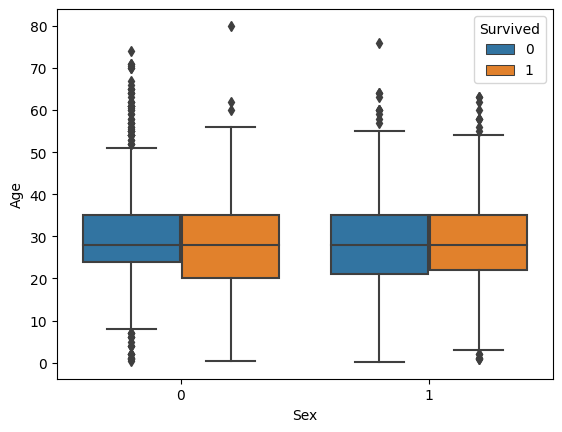

In [18]:
# Box Plot(Numerical-Categorical)
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'])

C:\Users\krish\AppData\Local\Temp\ipykernel_1788\430816039.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'])
C:\Users\krish\AppData\Local\Temp\ipykernel_1788\430816039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]['A

<AxesSubplot: xlabel='Age', ylabel='Density'>

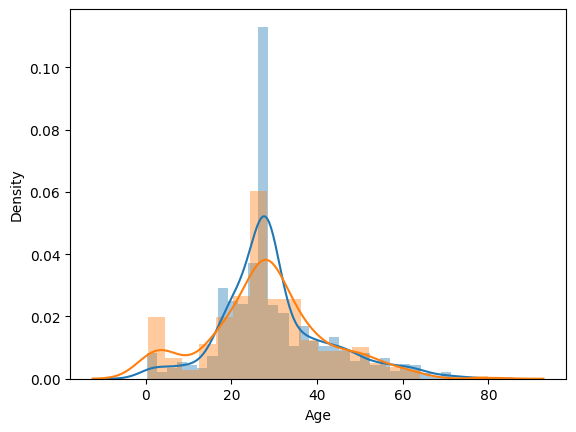

In [19]:
# Dist Plot(Categorical-Categorical)
sns.distplot(titanic[titanic['Survived']==0]['Age'])
sns.distplot(titanic[titanic['Survived']==1]['Age'])

<AxesSubplot: xlabel='Survived', ylabel='Pclass'>

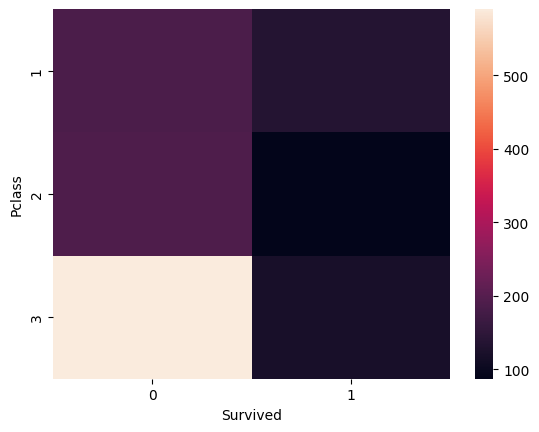

In [20]:
# HeatMap(Categorical-Categorical)
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [21]:
titanic.groupby('Pclass').mean()['Survived']*100

Pclass
1    42.105263
2    31.407942
3    16.784203
Name: Survived, dtype: float64

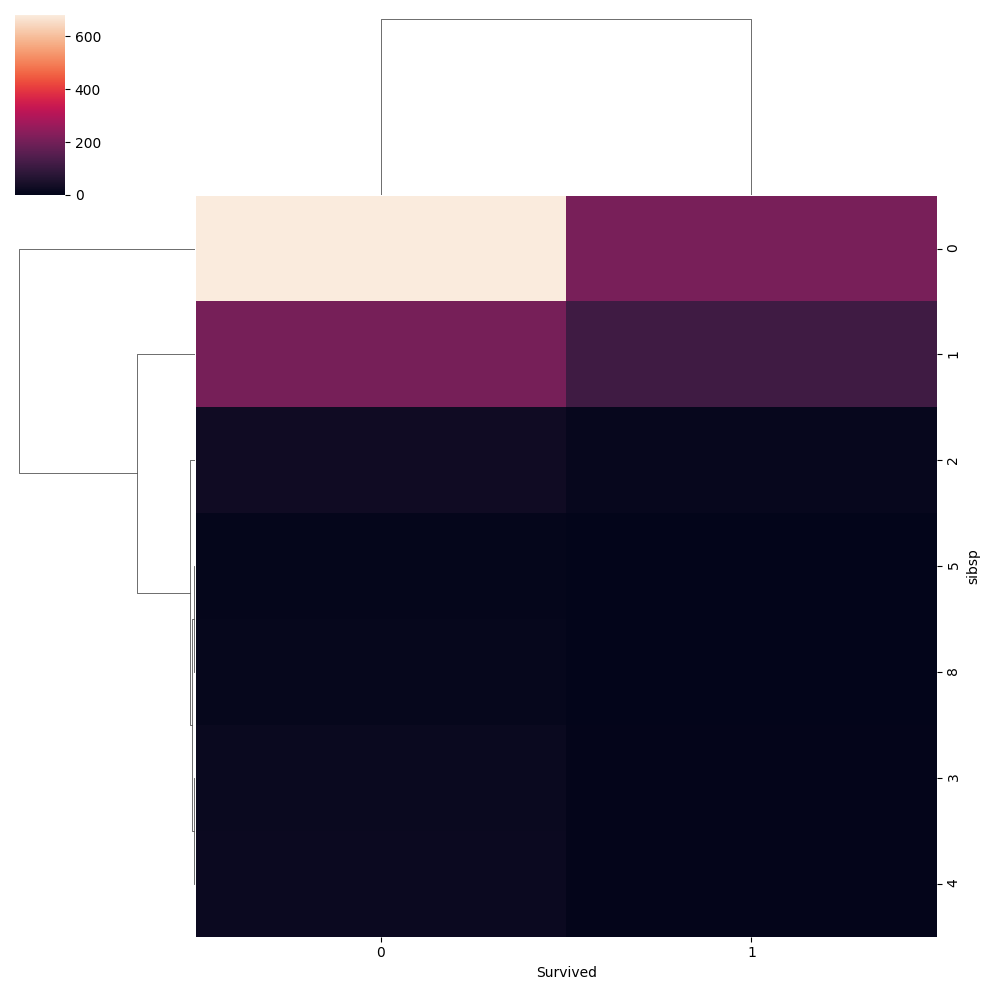

In [22]:
sns.clustermap(pd.crosstab(titanic['sibsp'],titanic['Survived']))

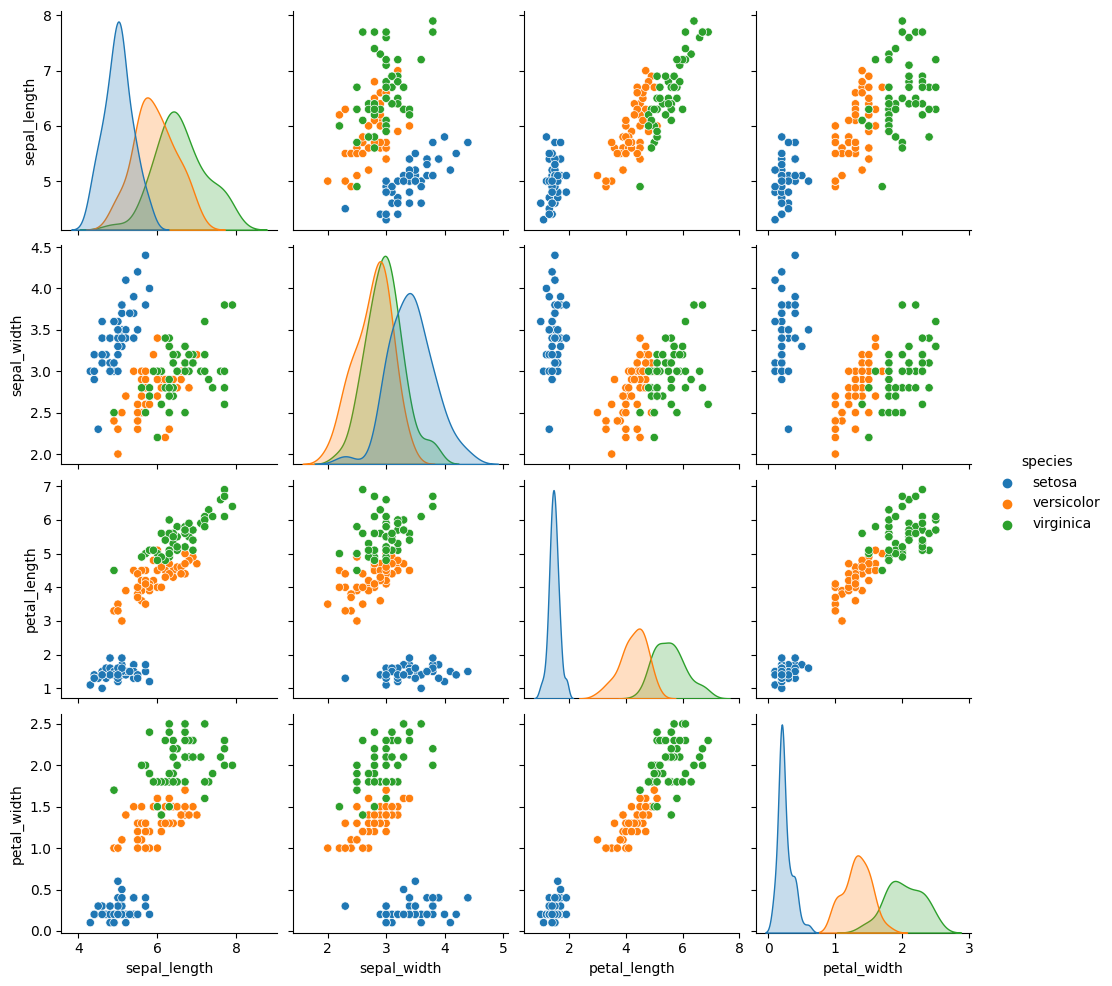

In [23]:
# Pairplot(Multiple Numerical)
sns.pairplot(iris,hue='species')

C:\Users\krish\AppData\Local\Temp\ipykernel_1788\384295921.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new = flights.groupby('year').sum().reset_index()


<AxesSubplot: xlabel='year', ylabel='passengers'>

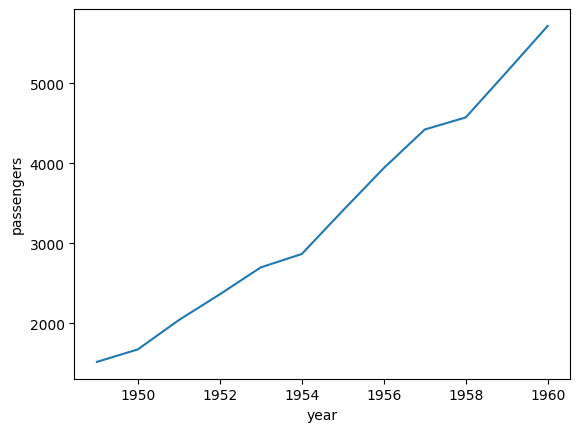

In [24]:
# Lineplot(Multiple Numerical)
new = flights.groupby('year').sum().reset_index()
sns.lineplot(x=new['year'],y=new['passengers'])

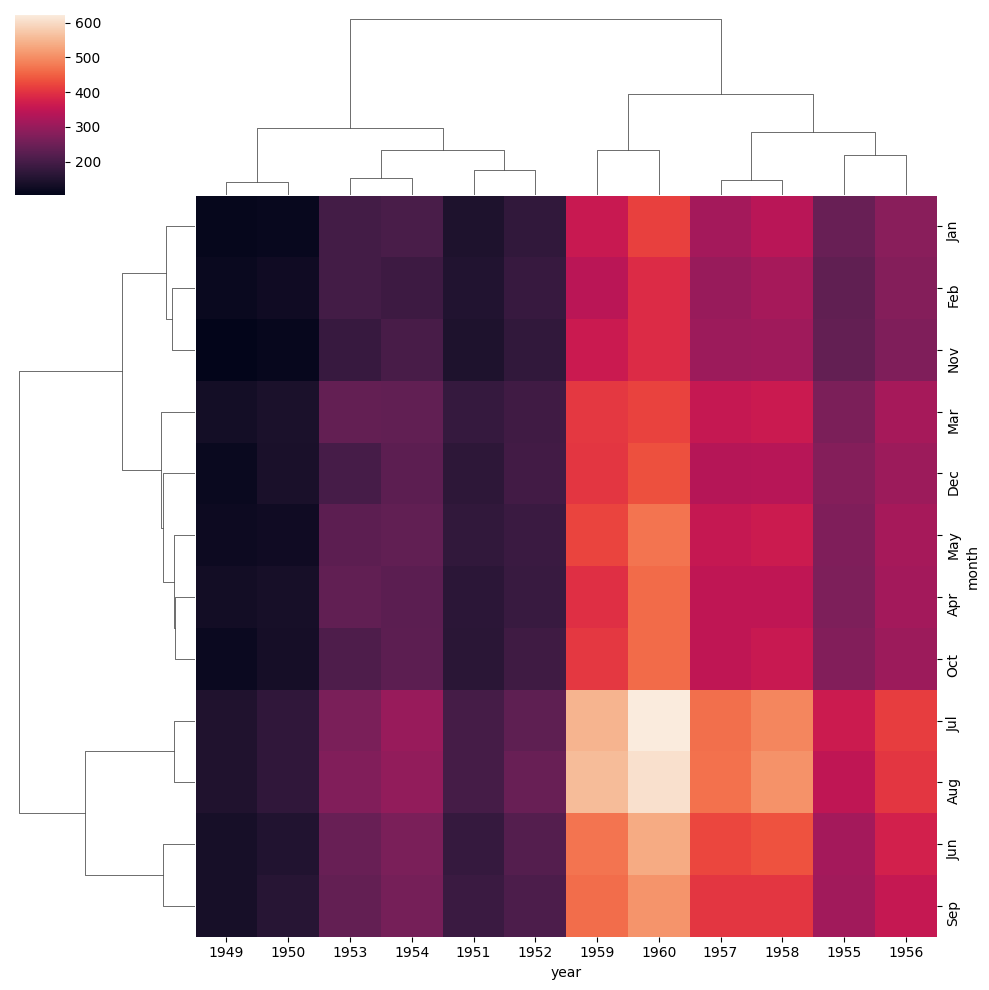

In [25]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))

-> Pandas Profiling

In [26]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

-------------------- Feature Engineering --------------------

--> Feature Transformation <--

--:Feature Scaling

1.Standardization

In [27]:
df = pd.read_csv('Social_Network_Ads.csv')

In [28]:
df2 = df.iloc[:,2:]

In [29]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [30]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train,x_test

(     Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
      Age  EstimatedSalary
 132   30            87000
 309   38            50000
 341   35            75000
 196   30            79000
 246   35            50000
 ..   ...              ...
 216   49            65000
 259   45           131000
 49    31            89000
 238   46            82000
 343   47            51000
 
 [120 rows x 2 columns])

In [31]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
scaler.mean_


array([3.78642857e+01, 6.98071429e+04])

In [33]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [34]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [35]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


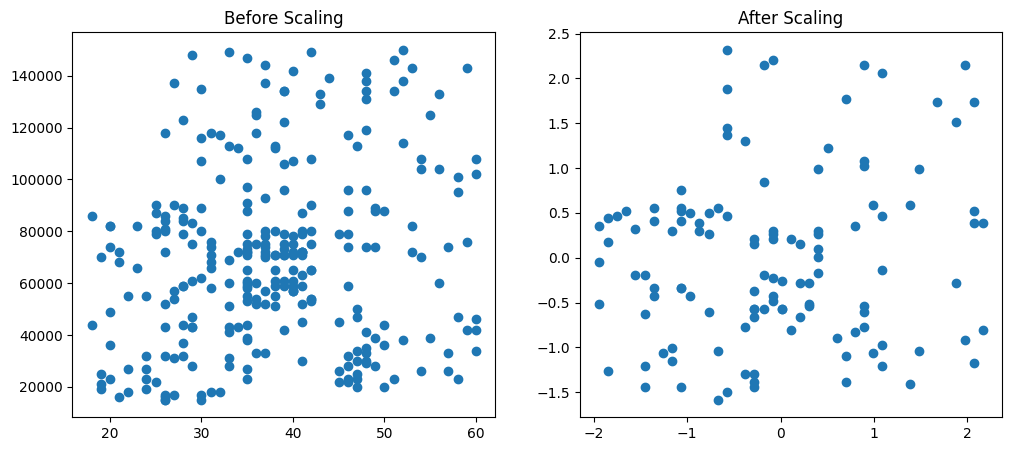

In [36]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_test_scaled['Age'],x_test_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

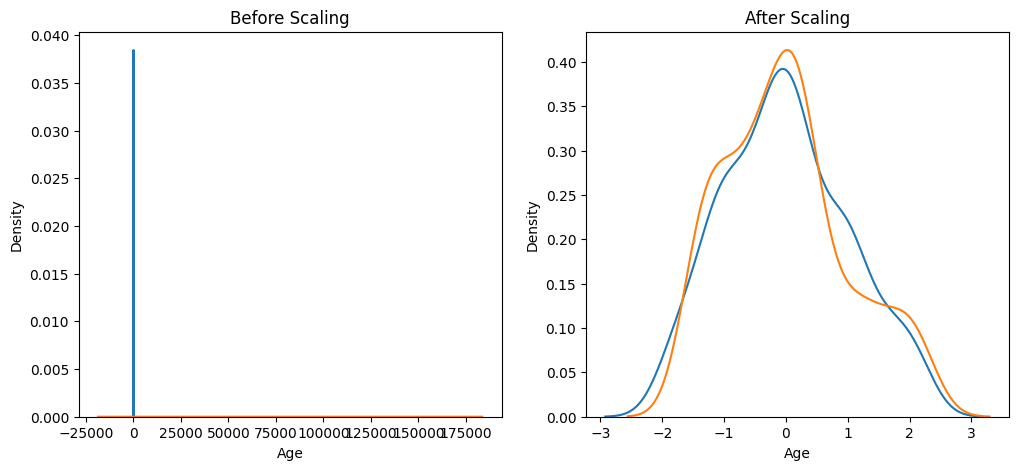

In [37]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show

2. Normalization

In [38]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [39]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

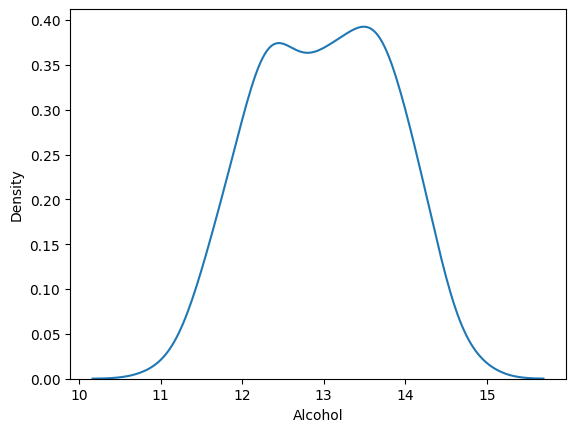

In [40]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot: xlabel='Malic acid', ylabel='Density'>

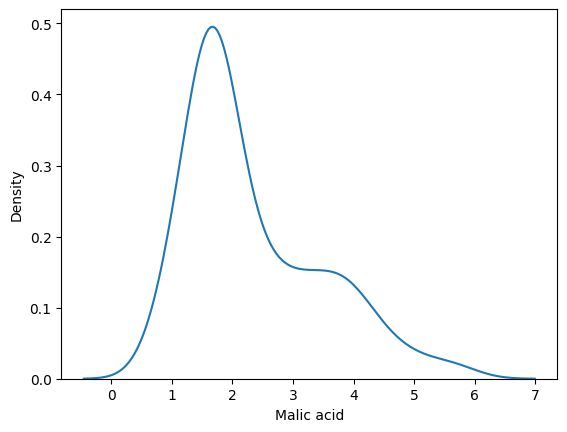

In [41]:
sns.kdeplot(df['Malic acid'])

<AxesSubplot: xlabel='Alcohol', ylabel='Malic acid'>

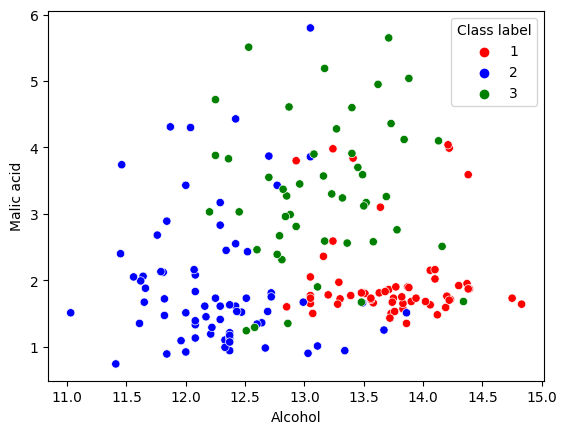

In [42]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label', palette=color_dict)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [46]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [47]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


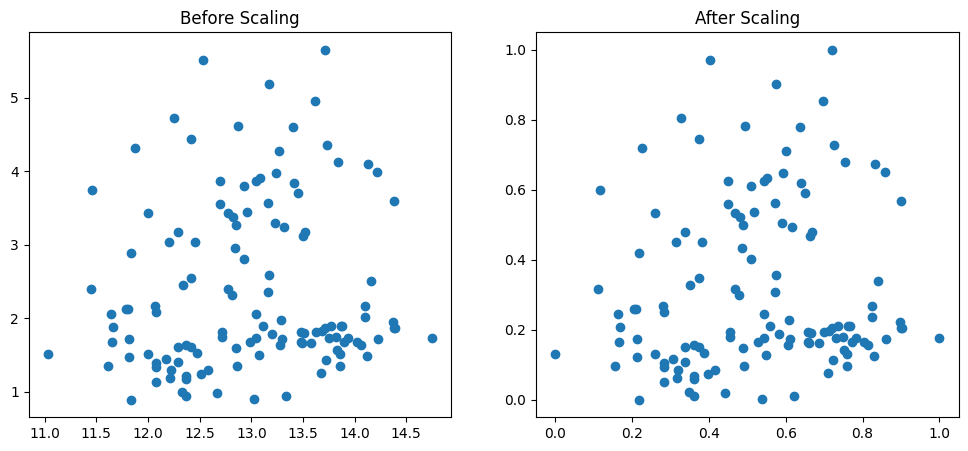

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'])
ax2.set_title("After Scaling")
plt.show()

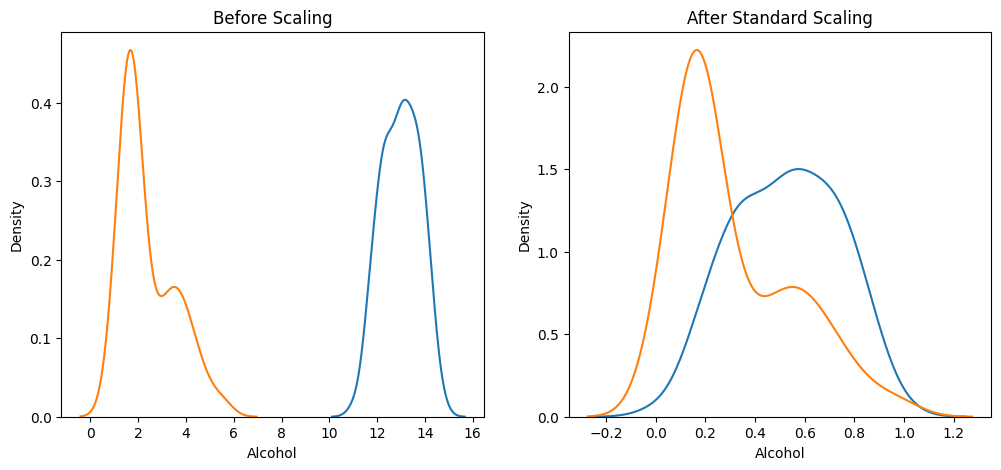

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

--: Encoding Categorial Data

1. Ordinal Encoding (Ordinal Data)

In [50]:
df = pd.read_csv('customer.csv')

In [51]:
df.sample(5)

,age,gender,review,education,purchased
30,73,Male,Average,UG,No
29,83,Female,Average,UG,Yes
10,98,Female,Good,UG,Yes
37,94,Male,Average,PG,Yes
4,16,Female,Average,UG,No


In [52]:
df = df.iloc[:,2:]

In [53]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2)

In [55]:
x_train[0:10]

,review,education
30,Average,UG
35,Poor,School
19,Poor,PG
29,Average,UG
38,Good,School
48,Good,UG
3,Good,PG
0,Average,School
39,Poor,PG
1,Poor,UG


In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [58]:
oe.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [59]:
x_train = oe.transform(x_train)

In [60]:
x_train[0:10]

array([[1., 1.],
       [0., 0.],
       [0., 2.],
       [1., 1.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [1., 0.],
       [0., 2.],
       [0., 1.]])

In [61]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
le.fit(y_train)

LabelEncoder()

In [64]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [65]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [66]:
y_train

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

2. One-Hot Encoding

In [67]:
df = pd.read_csv('cars.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [68]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [69]:
# One-Hot Encoding using Pandas
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


In [70]:
# K-1 One-Hot Encoding
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [71]:
# One-Hot Encoding using sklearn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

print(X_train.head())

print()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

X_train_new = ohe.fit_transform(X_train[['fuel','owner']])
X_test_new = ohe.transform(X_test[['fuel','owner']])

print("x_train_new shape: ",X_train_new.shape)

np.hstack((X_train[['brand','km_driven']].values,X_train_new))

         brand  km_driven    fuel         owner
5571   Hyundai      35000  Diesel   First Owner
2038      Jeep      60000  Diesel   First Owner
2957   Hyundai      25000  Petrol   First Owner
7618  Mahindra     130000  Diesel  Second Owner
6684   Hyundai     155000  Diesel   First Owner

x_train_new shape:  (6502, 7)


array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [72]:
# One-Hot Encoding with Top-Categories

counts = df['brand'].value_counts()
df['brand'].nunique()
threshold = 100
repl = counts[counts <= threshold].index
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
270,0,0,0,0,0,0,0,0,0,0,1,0,0
1201,0,0,0,0,0,1,0,0,0,0,0,0,0
6590,0,0,0,0,0,0,0,0,1,0,0,0,0
6153,0,0,0,0,0,0,1,0,0,0,0,0,0
5780,0,0,0,0,1,0,0,0,0,0,0,0,0


3. Column Transformer

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [74]:
df = pd.read_csv('covid_toy.csv')
print(df.head())
print()
print(df.isnull().sum())

   age  gender  fever cough     city has_covid
0   60    Male  103.0  Mild  Kolkata        No
1   27    Male  100.0  Mild    Delhi       Yes
2   42    Male  101.0  Mild    Delhi        No
3   31  Female   98.0  Mild  Kolkata        No
4   65  Female  101.0  Mild   Mumbai        No

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],test_size=0.2)

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']),
    ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'city'])],
    remainder='passthrough')

print("x_train: ", transformer.fit_transform(X_train).shape)
print("x_test", transformer.transform(X_test).shape)


x_train:  (80, 7)
x_test (20, 7)
